In [0]:
#load all the required libraries
import re    # for regular expressions 
import nltk  # for text manipulation 
import string 
import warnings 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# for advanced visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff
from sklearn.model_selection import StratifiedKFold

In [0]:
pd.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore", category=DeprecationWarning) 

%matplotlib inline


In [0]:
from google.colab import files
uploaded =files.upload()

Saving amazon_alexa.tsv to amazon_alexa.tsv


In [0]:
#reading the dataset 
data = pd.read_csv('amazon_alexa.tsv',sep='\t')

In [0]:
data.head()

rating  ... feedback
0       5  ...        1
1       5  ...        1
2       4  ...        1
3       5  ...        1
4       5  ...        1

[5 rows x 5 columns]

In [0]:
data.describe()

rating     feedback
count  3150.000000  3150.000000
mean      4.463175     0.918413
std       1.068506     0.273778
min       1.000000     0.000000
25%       4.000000     1.000000
50%       5.000000     1.000000
75%       5.000000     1.000000
max       5.000000     1.000000

In [0]:
data.isnull().any().any()

False

In [0]:
#lets create a varieable length for the data 
data['length'] =data['verified_reviews'].apply(len)

In [0]:
#describe the data according to the rating
data.groupby('rating').describe()

feedback                      ... length                              
          count mean  std  min  25%  ...    min    25%    50%     75%     max
rating                               ...                                     
1         161.0  0.0  0.0  0.0  0.0  ...    1.0  36.00  120.0  284.00  1124.0
2          96.0  0.0  0.0  0.0  0.0  ...    1.0  78.75  163.0  309.25  1686.0
3         152.0  1.0  0.0  1.0  1.0  ...    1.0  54.00  130.0  284.00  1954.0
4         455.0  1.0  0.0  1.0  1.0  ...    1.0  34.00   99.0  241.00  1360.0
5        2286.0  1.0  0.0  1.0  1.0  ...    1.0  26.00   64.0  135.00  2851.0

[5 rows x 16 columns]

In [0]:
#describing the data with feedback
data.groupby('feedback').describe()

rating                                ... length                            
           count      mean       std  min  25%  ...    min   25%    50%    75%     max
feedback                                        ...                                   
0          257.0  1.373541  0.484688  1.0  1.0  ...    1.0  53.0  137.0  289.0  1686.0
1         2893.0  4.737643  0.546544  3.0  5.0  ...    1.0  29.0   69.0  154.0  2851.0

[2 rows x 16 columns]

In [0]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

In [0]:
configure_plotly_browser_state()
init_notebook_mode(connected=False)
ratings = data['rating'].value_counts()

label_rating = ratings.index
size_rating = ratings.values

colors = ['pink', 'lightblue', 'aqua', 'gold', 'crimson']

rating_piechart = go.Pie(labels = label_rating,
                         values = size_rating,
                         marker = dict(colors = colors),
                         name = 'Alexa', hole = 0.3)

df = [rating_piechart]

layout = go.Layout(
           title = 'Distribution of Ratings for Alexa')

fig = go.Figure(data = df,
                 layout = layout)

py.iplot({"data":df,"layout":layout})


By looking at the above pie chart, we can infer that most of the Ratings are good for alexa. Around 72.6% people have given Alexa 5 Star rating, which is very good. 14.4% people have given Alexa a 4 Star Rating, which is also good. that means 72.6+14.4 = 87% people have given alexa good rating. 
4.38% people have given alexa an average rating of 3 stars. 3.05% people did not like alexa and chose to give only 2 star ratings to alexa whereas 5.11% people hated alexa and decided to give alexa only 1 Star Rating. This a total of 3.05+5.11 = 8.16% people did not like alexa.

In [0]:
data['variation'].value_counts()

Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: variation, dtype: int64

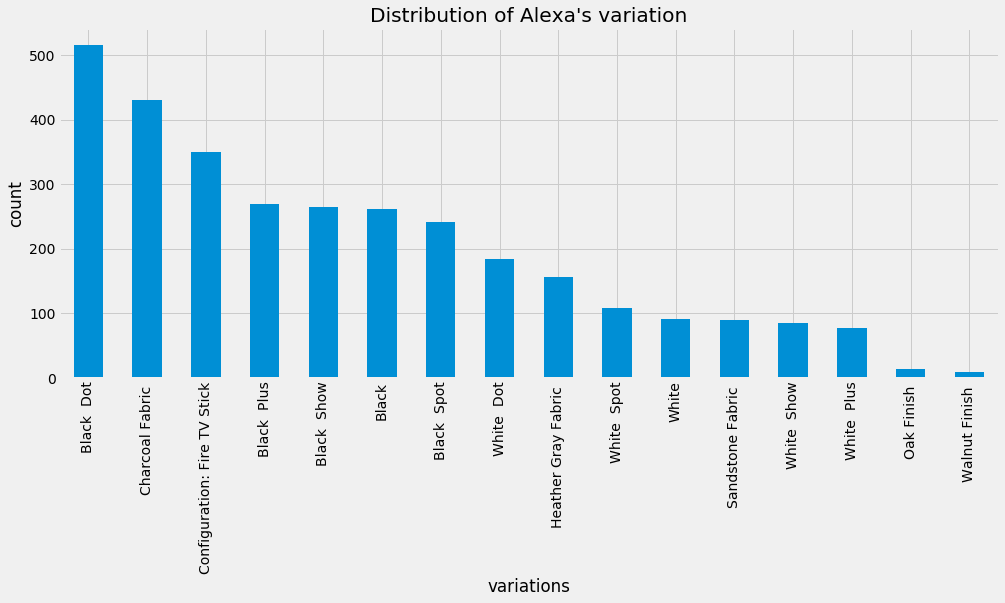

In [0]:
data['variation'].value_counts().plot.bar(figsize=(15,6))
plt.title("Distribution of Alexa's variation")
plt.xlabel("variations")
plt.ylabel("count")
plt.show()

The above bar plot show's the popularity of the variation of Alexa. It clearly state that **Black Dot** is the most popular variation among all.Followed by **Charcoal Fabric**.Some of the unpopular variations of alexa are **Oak Finish** and **Walnut Finish** whose count is very less the dataset signifying rare use of this variations 

In [0]:
#distributions of feedback of alexa's
configure_plotly_browser_state()
init_notebook_mode(connected=False)
feedback = data['feedback'].value_counts()

label_rating = feedback.index
size_rating = feedback.values

colors = ['red', 'blue']

rating_piechart = go.Pie(labels = label_rating,
                         values = size_rating,
                         marker = dict(colors = colors),
                         name = 'Alexa', hole = 0.3)

df = [rating_piechart]

layout = go.Layout(
           title = 'Distribution of Ratings for Alexa')

fig = go.Figure(data = df,
                 layout = layout)

py.iplot({"data":df,"layout":layout})

It can be observed that a sum total of 91.8% of the population are loving Alexa by giving positive rating.While only 8.16% are not satisfied with the Alexa which is very less as compared to the positive ratings

Text(0.5, 1.0, 'review length distributions')

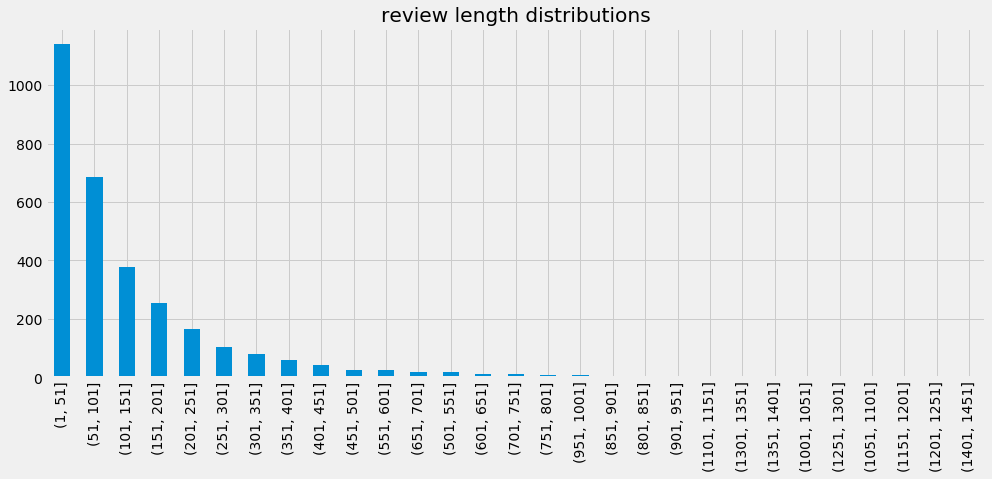

In [0]:
data['length_range'] = pd.cut(data.length,[x for x in range(1,1500,50)])

data['length_range'].value_counts().plot.bar(figsize =(15,6))
plt.title("review length distributions")

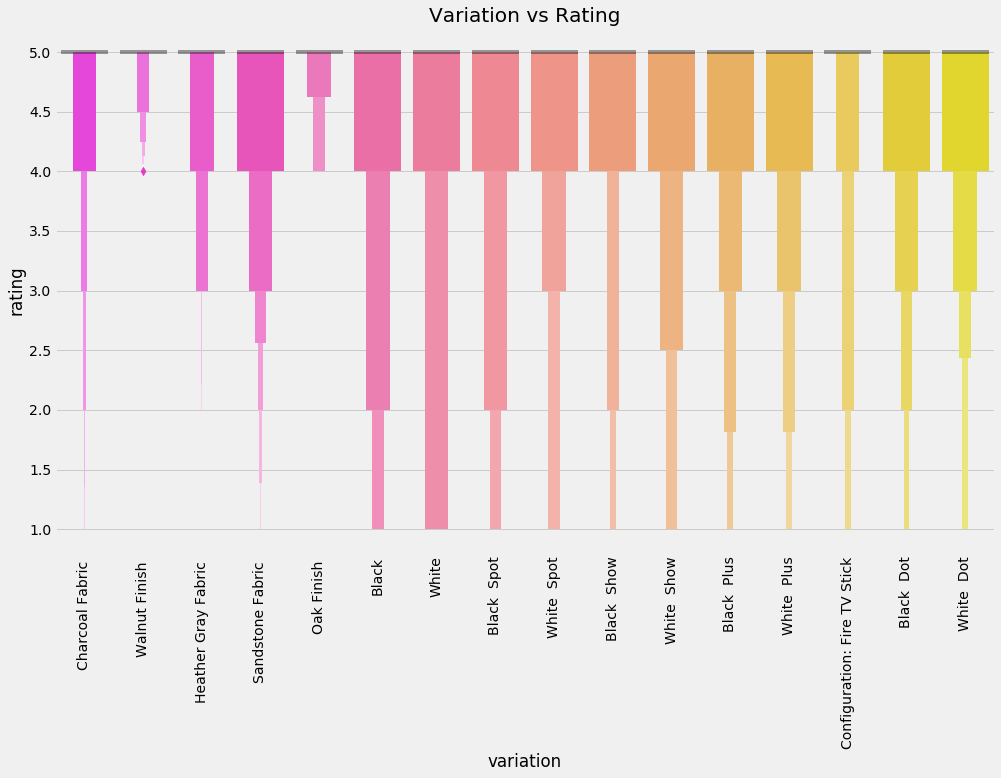

In [0]:
#variations vs rating
plt.rcParams['figure.figsize'] = (15, 9)
sns.boxenplot(x='variation',y='rating',data =data,palette="spring")
plt.title("Variation vs Rating")
plt.xticks(rotation=90)
plt.show()

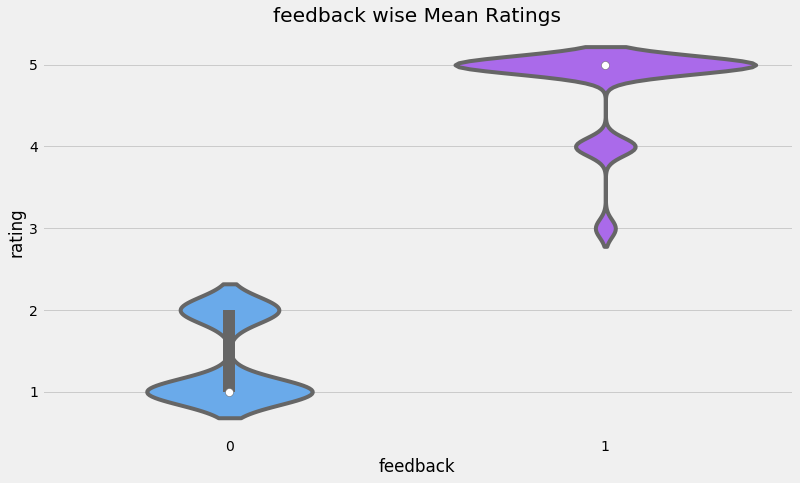

In [0]:
plt.rcParams['figure.figsize'] = (12, 7)
plt.style.use('fivethirtyeight')

sns.violinplot(data['feedback'], data['rating'], palette = 'cool')
plt.title("feedback wise Mean Ratings")
plt.show()

In [0]:
#word counts 
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')
words =cv.fit_transform(data.verified_reviews)
sum_words = words.sum(axis=0)


matrix([[4, 1, 1, ..., 1, 1, 1]], dtype=int64)

In [0]:
words_freq =[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq,key = lambda x:x[1],reverse=True)

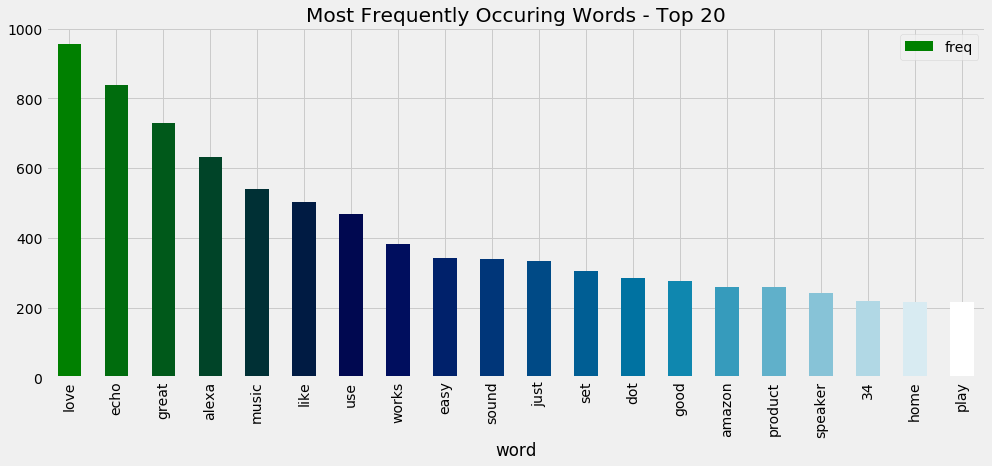

In [0]:
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])
plt.style.use('fivethirtyeight')
color = plt.cm.ocean(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 6), color = color)
plt.title("Most Frequently Occuring Words - Top 20")
plt.show()

In [0]:
from wordcloud import WordCloud
word_cloud = WordCloud(width=800,height=400,random_state=21,max_font_size=110).generate_from_frequencies(dict(words_freq))


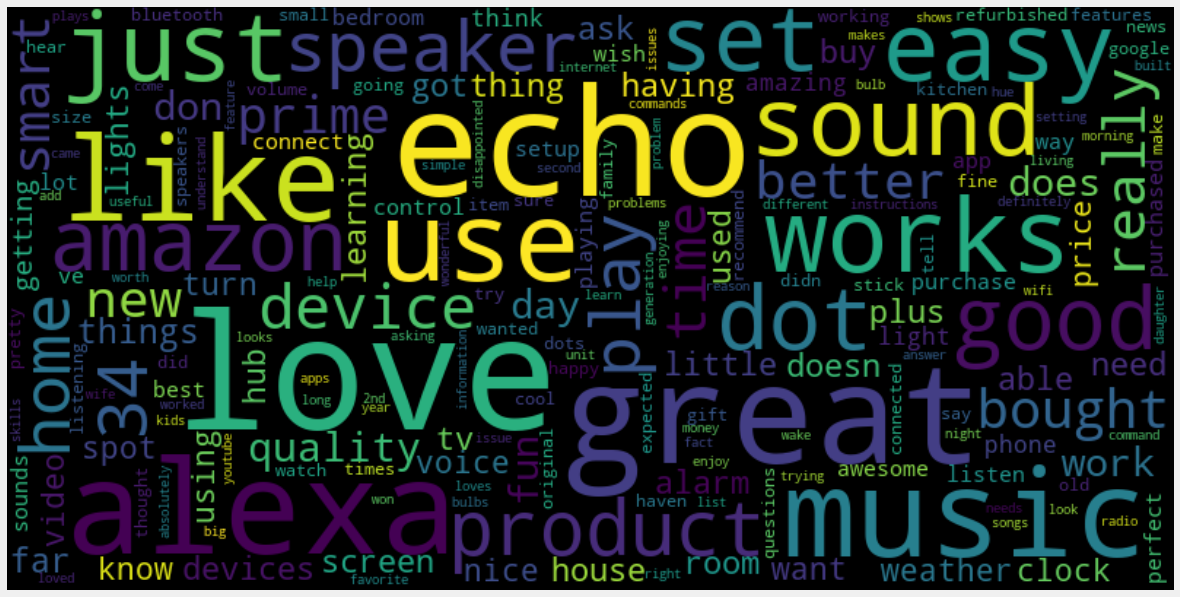

In [0]:
plt.figure(figsize=(20,10))
plt.imshow(word_cloud,interpolation="bilinear")
plt.axis("off")
plt.show()

In [0]:
##modelling part 
def remove_pattern(input_text,pattern):
  r = re.findall(pattern,input_text)
  for i in r:
    input_text = re.sub(i,'',input_text)
  return input_text

In [0]:
data['tidy_review'] ='a'

In [0]:
for i in range(len(data)):
  data['tidy_review'][i] = remove_pattern(data['verified_reviews'][i],"@[\w]*")

In [0]:
data.head()

rating  ...                                                                                                                                                                                          tidy_review
0       5  ...                                                                                                                                                                                        Love my Echo!
1       5  ...                                                                                                                                                                                            Loved it!
2       4  ...  Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.
3       5  ...                         I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.
4       5  ...                                                                                                                                                                                                Music

[5 rows x 8 columns]

In [0]:
data['tidy_review'] = data['tidy_review'].str.replace("[^a-zA-Z#]", " ") 
data.head(10)

rating  ...                                                                                                                                                                                              tidy_review
0       5  ...                                                                                                                                                                                            Love my Echo 
1       5  ...                                                                                                                                                                                                Loved it 
2       4  ...      Sometimes while playing a game  you can answer a question correctly but Alexa says you got it wrong and answers the same as you   I like being able to turn lights on and off while away from home 
3       5  ...                             I have had a lot of fun with this thing  My   yr old learns about dinosaurs  i control the lights and play games like categories  Has nice sound when playing music as well 
4       5  ...                                                                                                                                                                                                    Music
5       5  ...                             I received the echo as a gift  I needed another Bluetooth or something to play music easily accessible  and found this smart speaker  Can t wait to see what else it can do 
6       3  ...  Without having a cellphone  I cannot use many of her features  I have an iPad but do not see that of any use   It IS a great alarm   If u r almost deaf  you can hear her alarm in the bedroom from ...
7       5  ...  I think this is the  th one I ve purchased  I m working on getting one in every room of my house  I really like what features they offer specifily playing music on all Echos and controlling the li...
8       5  ...                                                                                                                                                                                              looks great
9       5  ...                                                                                       Love it  I ve listened to songs I haven t heard since childhood  I get the news  weather  information  It s great 

[10 rows x 8 columns]

In [0]:
data['tidy_review'] = data['tidy_review'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [0]:
data.head()

rating  ...                                                                                                                            tidy_review
0       5  ...                                                                                                                              Love Echo
1       5  ...                                                                                                                                  Loved
2       4  ...  Sometimes while playing game answer question correctly Alexa says wrong answers same like being able turn lights while away from home
3       5  ...               have with this thing learns about dinosaurs control lights play games like categories nice sound when playing music well
4       5  ...                                                                                                                                  Music

[5 rows x 8 columns]

In [0]:
tokenized_review = data['tidy_review'].apply(lambda x: x.split())
tokenized_review.head(5)

0                                                                                                                                                   [Love, Echo]
1                                                                                                                                                        [Loved]
2    [Sometimes, while, playing, game, answer, question, correctly, Alexa, says, wrong, answers, same, like, being, able, turn, lights, while, away, from, home]
3                   [have, with, this, thing, learns, about, dinosaurs, control, lights, play, games, like, categories, nice, sound, when, playing, music, well]
4                                                                                                                                                        [Music]
Name: tidy_review, dtype: object

In [0]:
from nltk.stem.porter import *

In [0]:
stemmer = PorterStemmer()

In [0]:
tokenized_review = tokenized_review.apply(lambda x:[stemmer.stem(i) for i in x])
tokenized_review.head(5)

0                                                                                                                                       [love, echo]
1                                                                                                                                             [love]
2    [sometim, while, play, game, answer, question, correctli, alexa, say, wrong, answer, same, like, be, abl, turn, light, while, away, from, home]
3                 [have, with, thi, thing, learn, about, dinosaur, control, light, play, game, like, categori, nice, sound, when, play, music, well]
4                                                                                                                                            [music]
Name: tidy_review, dtype: object

In [0]:
for i in range(len(tokenized_review)):
  tokenized_review[i] = ' '.join(tokenized_review[i])
data['tidy_review'] = tokenized_review

In [0]:
data.head()

rating  ...                                                                                                                tidy_review
0       5  ...                                                                                                                  love echo
1       5  ...                                                                                                                       love
2       4  ...  sometim while play game answer question correctli alexa say wrong answer same like be abl turn light while away from home
3       5  ...             have with thi thing learn about dinosaur control light play game like categori nice sound when play music well
4       5  ...                                                                                                                      music

[5 rows x 8 columns]

In [0]:
##three methods of feature extraction from text is used
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import gensim

In [0]:
bow_data = CountVectorizer(max_df=0.9,min_df=2,max_features=1000,stop_words='english')
bow = bow_data.fit_transform(data['tidy_review'])

In [0]:
bow.shape

(3150, 1000)

# *Sentiment analysis of Alexa*

## **logistic regression**

In [0]:
X_bow = bow
y_bow = data['feedback'].values
X_bow.shape,y_bow.shape

((3150, 1000), (3150,))

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X_bow,y_bow,test_size =0.3,random_state=111)

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [0]:
log_model = LogisticRegression()
log_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = log_model.predict(X_test)

In [0]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.46      0.57        74
           1       0.96      0.99      0.97       871

    accuracy                           0.94       945
   macro avg       0.85      0.72      0.77       945
weighted avg       0.94      0.94      0.94       945



**validation with cross validation**

In [0]:
cv_lreg1_val = cross_val_score(log_model,X_bow,y_bow,cv=StratifiedKFold())
cv_lreg1_val

array([0.93492063, 0.93015873, 0.92222222, 0.93650794, 0.93015873])

AS we can see all the accuracy of the logistic regression model is perfoming better in the same range.So i assume that this model is free from overfitting and under fitting and is valid

**creating new dataset by mergin sparese and dense dataset **

In [0]:
#the probabillity predictied by our logistic model would be used as a features in the new dataset
log_text = log_model.predict_proba(X_bow)
log_data = data[['variation','feedback']]
log_data['text_proba1'] = log_text[:,0]
log_data['text_proba2'] = log_text[:,1]
X_log = log_data[['variation','text_proba1','text_proba2']]
y_log = log_data['feedback']

#making dummy variable for the variation 
X_log = pd.get_dummies(X_log)
X_log.head()

text_proba1  text_proba2  ...  variation_White  Show  variation_White  Spot
0     0.008315     0.991685  ...                      0                      0
1     0.011217     0.988783  ...                      0                      0
2     0.169539     0.830461  ...                      0                      0
3     0.008863     0.991137  ...                      0                      0
4     0.073561     0.926439  ...                      0                      0

[5 rows x 18 columns]

In [0]:
kpca =KernelPCA(n_components=None)
X_log_pca = kpca.fit_transform(X_log)


In [0]:
pd.DataFrame(X_log_pca).head()

0         1         2   ...        13        14        15
0 -0.462906  0.764976  0.165122  ... -0.004199 -0.002729 -0.001329
1 -0.462788  0.764510  0.164708  ... -0.004208 -0.002705 -0.001319
2 -0.049230 -0.077008 -0.070343  ...  0.021009  0.169852  1.016554
3 -0.462883  0.764888  0.165044  ... -0.004201 -0.002724 -0.001327
4 -0.460271  0.754513  0.155829  ... -0.004399 -0.002200 -0.001099

[5 rows x 16 columns]

In [0]:
#split the data into train and test set and fit the model
X_train_log,X_test_log,y_train_log,y_test_log =train_test_split(X_log_pca,y_log,test_size =0.3,random_state=123)
log_model_final = LogisticRegression()
log_model_final.fit(X_train_log,y_train_log)
log_final_pred = log_model_final.predict(X_test_log)
print(accuracy_score(y_test_log,log_final_pred))

0.9661375661375662


In [0]:
#validate the model with cross validation
k_fold = StratifiedKFold()
cv_log_final = cross_val_score(log_model_final,X_log_pca,y_log,cv=k_fold)
print(cv_log_final)

[0.95873016 0.96190476 0.95873016 0.97460317 0.96984127]


As we can see all the  validation split is performing aproximatety same. So our model is valid

***parameter tuning logistic model ***

In [0]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {
     
    'C' : np.logspace(-4, 4, 20)}
    
]
log_clf = GridSearchCV(LogisticRegression(),param_grid,cv=5)
log_clf.fit(X_log_pca,y_log)
log_clf.best_params_
log_model2_final = LogisticRegression(C=1.62377)
log_model2_final.fit(X_train_log,y_train_log)
log_final2_pred = log_model2_final.predict(X_test_log)
print(classification_report(y_test_log,log_final_pred))


              precision    recall  f1-score   support

           0       1.00      0.58      0.73        76
           1       0.96      1.00      0.98       869

    accuracy                           0.97       945
   macro avg       0.98      0.79      0.86       945
weighted avg       0.97      0.97      0.96       945



So the final accuracy of the model is 97.0

## **Xgboost classifier**

In [0]:
from xgboost import XGBClassifier
xgb = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3).fit(X_train,y_train)
xgb_pred = xgb.predict(X_test)
print(classification_report(y_test,xgb_pred))

              precision    recall  f1-score   support

           0       0.73      0.49      0.59        74
           1       0.96      0.99      0.97       871

    accuracy                           0.95       945
   macro avg       0.85      0.74      0.78       945
weighted avg       0.94      0.95      0.94       945



In [0]:
cv_xgb_val = cross_val_score(xgb,X_bow,y_bow,cv=StratifiedKFold())
cv_xgb_val

array([0.93492063, 0.93650794, 0.9015873 , 0.92222222, 0.93492063])

In [0]:
#the probabillity predictied by our logistic model would be used as a features in the new dataset
xgb_text = xgb.predict_proba(X_bow)
xgb_data = data[['variation','feedback']]
xgb_data['text_proba1'] = xgb_text[:,0]
xgb_data['text_proba2'] = xgb_text[:,1]
X_xgb = xgb_data[['variation','text_proba1','text_proba2']]
y_xgb = xgb_data['feedback']

#making dummy variable for the variation 
X_xgb = pd.get_dummies(X_xgb)
kpca =KernelPCA(n_components=None)
X_xgb_pca = kpca.fit_transform(X_xgb)

X_train_xgb,X_test_xgb,y_train_xgb,y_test_xgb =train_test_split(X_xgb_pca,y_xgb,test_size =0.3,random_state=123)
xgb_model_final = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3)
xgb_model_final.fit(X_train_xgb,y_train_xgb)
xgb_final_pred = xgb_model_final.predict(X_test_xgb)
print(accuracy_score(y_test_xgb,xgb_final_pred))

0.9703703703703703


**svm classifier**

getting a fair accuracy of 97.03%^

In [0]:
#cross validation to for the model 
k_fold = StratifiedKFold()
cv_xgb_final = cross_val_score(xgb_model_final,X_xgb_pca,y_xgb,cv=k_fold)
print(cv_xgb_final)

[0.96825397 0.96825397 0.95238095 0.96190476 0.98730159]


# 

# Support Vector Machine

In [0]:
from sklearn.svm import SVC 
svc = SVC(probability=True)
svc.fit(X_train,y_train)
svc_pred = svc.predict(X_test)
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

           0       1.00      0.11      0.20        74
           1       0.93      1.00      0.96       871

    accuracy                           0.93       945
   macro avg       0.96      0.55      0.58       945
weighted avg       0.94      0.93      0.90       945



In [0]:
k_fold = StratifiedKFold()
cv_svc = cross_val_score(svc,X_bow,y_bow,cv=k_fold)
print(cv_svc)

[0.92380952 0.92380952 0.91904762 0.91746032 0.91746032]


In [0]:
svc_text = svc.predict_proba(X_bow)
svc_data = data[['variation','feedback']]
svc_data['text_proba1'] = svc_text[:,0]
svc_data['text_proba2'] = svc_text[:,1]
X_svc = svc_data[['variation','text_proba1','text_proba2']]
y_svc = svc_data['feedback']

#making dummy variable for the variation 
X_svc = pd.get_dummies(X_svc)
kpca =KernelPCA(n_components=None)
X_svc_pca = kpca.fit_transform(X_svc)

X_train_svc,X_test_svc,y_train_svc,y_test_svc =train_test_split(X_svc_pca,y_svc,test_size =0.3,random_state=123)
svc_model_final = SVC(kernel='poly')
svc_model_final.fit(X_train_svc,y_train_svc)
svc_final_pred = svc_model_final.predict(X_test_svc)
print(accuracy_score(y_test_svc,svc_final_pred))

0.964021164021164


In [0]:
k_fold = StratifiedKFold()
cv_svc_final = cross_val_score(svc_model_final,X_svc_pca,y_svc,cv=k_fold)
print(cv_svc_final)

[0.97301587 0.96507937 0.95396825 0.96507937 0.98571429]


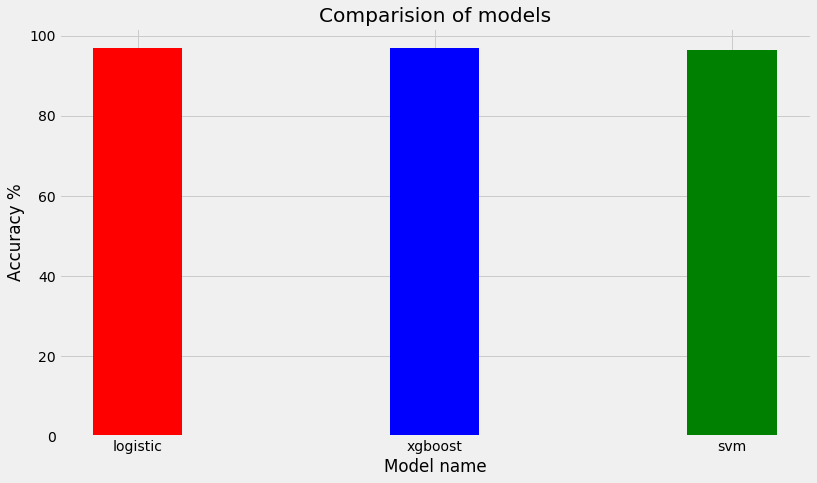

In [0]:
###comparision of models 
model =['logistic','xgboost','svm']
accuracy=[97,97.03,96.40]
plt.bar(x=model,height=accuracy,width=0.3,color=['red','blue','green'])
plt.xlabel("Model name")
plt.ylabel("Accuracy %")
plt.title("Comparision of models")
plt.show()

rating       date  ... text_proba1 text_proba2
0       5  31-Jul-18  ...    0.008315    0.991685
1       5  31-Jul-18  ...    0.011217    0.988783
2       4  31-Jul-18  ...    0.169539    0.830461
3       5  31-Jul-18  ...    0.008863    0.991137
4       5  31-Jul-18  ...    0.073561    0.926439

[5 rows x 10 columns]